In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración inicial
np.random.seed(99) # Semilla distinta para variar
random.seed(99)
n_rows = 250

restaurantes = ['Burger King', 'McDonalds', 'Subway', 'Domino\'s', 'KFC', 'Tacos Mike']

# Generación de datos base
data = {
    'Order_ID': range(5000, 5000 + n_rows),
    'Fecha': [datetime(2024, 1, 1) + timedelta(days=random.randint(0, 180)) for _ in range(n_rows)],
    'Restaurante': [random.choice(restaurantes) for _ in range(n_rows)],
    'Total_Pagado': [round(random.uniform(5.0, 50.0), 2) for _ in range(n_rows)],
    'Tiempo_Entrega': [random.randint(15, 90) for _ in range(n_rows)], # Minutos
    'Rating': [random.randint(1, 5) for _ in range(n_rows)]
}

df_food = pd.DataFrame(data)

# --- ☢️ ZONA DE SABOTAJE (NO MIRAR SI QUIERES SORPRESAS) ☢️ ---

# 1. Inyección de Nulos en Rating (La gente olvida calificar)
indices_nulos = df_food.sample(frac=0.15).index
df_food.loc[indices_nulos, 'Rating'] = np.nan

# 2. Suciedad en Total_Pagado (Mezcla de números y texto 'USD')
indices_usd = df_food.sample(frac=0.1).index
df_food.loc[indices_usd, 'Total_Pagado'] = df_food.loc[indices_usd, 'Total_Pagado'].apply(lambda x: f"{x} USD")

# 3. Lógica Rota: Tiempos de entrega negativos (Viajeros del tiempo)
df_food.loc[10, 'Tiempo_Entrega'] = -20
df_food.loc[45, 'Tiempo_Entrega'] = -5

# 4. Duplicados: El sistema falló y duplicó pedidos
df_food = pd.concat([df_food, df_food.head(7)], ignore_index=True)

print("🍔 Dataset 'df_food' generado. ¡A limpiar!")

🍔 Dataset 'df_food' generado. ¡A limpiar!


C:\Users\Dark7 120gb\AppData\Local\Temp\ipykernel_24252\1570551099.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['44.43 USD' '46.83 USD' '38.69 USD' '14.79 USD' '32.93 USD' '16.83 USD'
 '39.88 USD' '32.27 USD' '48.22 USD' '30.34 USD' '25.61 USD' '14.81 USD'
 '22.08 USD' '15.56 USD' '38.83 USD' '6.33 USD' '22.98 USD' '40.71 USD'
 '47.45 USD' '16.54 USD' '33.85 USD' '27.05 USD' '17.91 USD' '13.78 USD'
 '40.16 USD']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_food.loc[indices_usd, 'Total_Pagado'] = df_food.loc[indices_usd, 'Total_Pagado'].apply(lambda x: f"{x} USD")


In [3]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        257 non-null    int64         
 1   Fecha           257 non-null    datetime64[ns]
 2   Restaurante     257 non-null    object        
 3   Total_Pagado    257 non-null    object        
 4   Tiempo_Entrega  257 non-null    int64         
 5   Rating          218 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 12.2+ KB


In [4]:
df_food.head(20)

,Order_ID,Fecha,Restaurante,Total_Pagado,Tiempo_Entrega,Rating
0,5000,2024-04-13,Burger King,16.54 USD,31,3.0
1,5001,2024-04-07,Domino's,34.32,51,4.0
2,5002,2024-02-21,Domino's,35.25,18,4.0
3,5003,2024-06-02,McDonalds,27.7,85,1.0
4,5004,2024-02-15,Subway,44.18,80,4.0
5,5005,2024-02-28,Domino's,29.44,83,1.0
6,5006,2024-03-04,Subway,15.56 USD,48,NaN
7,5007,2024-02-04,McDonalds,28.6,33,5.0
8,5008,2024-01-23,McDonalds,35.92,46,5.0
9,5009,2024-03-05,Domino's,23.94,67,1.0


In [5]:
df_food=df_food.drop_duplicates()
df_food.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [6]:
df_food.isnull().sum()

Order_ID           0
Fecha              0
Restaurante        0
Total_Pagado       0
Tiempo_Entrega     0
Rating            38
dtype: int64

In [7]:
df_food['Total_Pagado']=df_food['Total_Pagado'].astype(str)
df_food['Total_Pagado']=df_food['Total_Pagado'].str.strip(' USD').astype(float)
df_food

,Order_ID,Fecha,Restaurante,Total_Pagado,Tiempo_Entrega,Rating
0,5000,2024-04-13,Burger King,16.54,31,3.0
1,5001,2024-04-07,Domino's,34.32,51,4.0
2,5002,2024-02-21,Domino's,35.25,18,4.0
3,5003,2024-06-02,McDonalds,27.70,85,1.0
4,5004,2024-02-15,Subway,44.18,80,4.0
...,...,...,...,...,...,...
245,5245,2024-06-09,Domino's,47.00,62,2.0
246,5246,2024-05-30,Tacos Mike,23.35,58,5.0
247,5247,2024-05-27,McDonalds,10.80,38,5.0
248,5248,2024-03-16,McDonalds,35.01,75,5.0


In [8]:
df_food.groupby('Restaurante')['Rating'].median()

Restaurante
Burger King    3.0
Domino's       2.0
KFC            3.0
McDonalds      3.0
Subway         2.0
Tacos Mike     2.0
Name: Rating, dtype: float64

In [9]:
#para rellenar los nulls de ratings uso median 
# Para llenar los nulos dependiendo del restaurante (no es lo mismo el rating promedio de "Sushi Zen" que el de "Tacos Mike"), necesitas usar transform
df_food['Rating']=df_food['Rating'].fillna(df_food.groupby('Restaurante')['Rating'].transform('median'))

In [10]:
df_food[df_food['Tiempo_Entrega']<0]

,Order_ID,Fecha,Restaurante,Total_Pagado,Tiempo_Entrega,Rating
10,5010,2024-04-08,Tacos Mike,28.60,-20,2.0
45,5045,2024-02-22,Burger King,40.09,-5,5.0


In [11]:
#me quedo solo con los tiempos de entrega positivos
df_food=df_food[df_food['Tiempo_Entrega']>=0]

In [12]:
df_food.isnull().sum()

Order_ID          0
Fecha             0
Restaurante       0
Total_Pagado      0
Tiempo_Entrega    0
Rating            0
dtype: int64

In [13]:
# Verificamos que no queden nulos y que los números tengan sentido
print(df_food.describe())
print("\n--- Info Final ---")
df_food.info()

          Order_ID                          Fecha  Total_Pagado  \
count   248.000000                            248    248.000000   
mean   5125.282258  2024-04-01 02:25:09.677419264     26.746694   
min    5000.000000            2024-01-01 00:00:00      5.030000   
25%    5063.750000            2024-02-19 00:00:00     15.955000   
50%    5125.500000            2024-04-02 00:00:00     25.390000   
75%    5187.250000            2024-05-15 00:00:00     38.267500   
max    5249.000000            2024-06-29 00:00:00     49.920000   
std      72.057114                            NaN     13.353656   

       Tiempo_Entrega      Rating  
count      248.000000  248.000000  
mean        51.633065    2.778226  
min         15.000000    1.000000  
25%         34.000000    2.000000  
50%         51.000000    3.000000  
75%         71.250000    4.000000  
max         90.000000    5.000000  
std         21.732046    1.305241  

--- Info Final ---
<class 'pandas.core.frame.DataFrame'>
Index: 248 ent

In [14]:
df_food.groupby('Restaurante')[['Rating','Tiempo_Entrega']].mean().sort_values('Tiempo_Entrega')

,Rating,Tiempo_Entrega
Restaurante,,
Burger King,3.179487,46.769231
McDonalds,2.964286,49.321429
Domino's,2.282051,50.307692
Subway,2.578947,53.000000
KFC,3.025641,55.256410
Tacos Mike,2.540541,56.432432


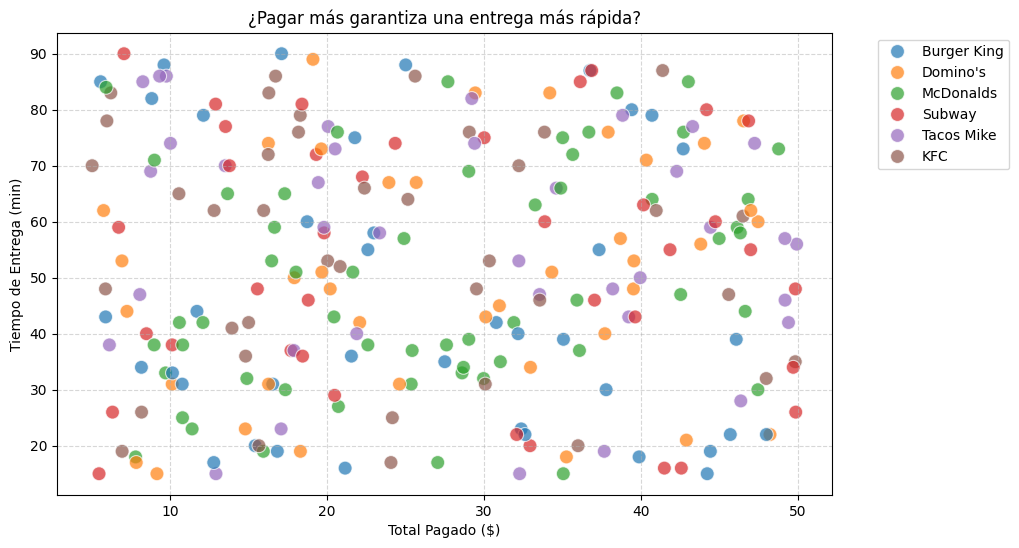

In [15]:
plt.figure(figsize=(10, 6))

# Scatter Plot: Precio vs Tiempo
# hue='Restaurante': Pintamos cada punto según el restaurante para ver si alguno es outlier
sns.scatterplot(
    data=df_food,
    x='Total_Pagado',
    y='Tiempo_Entrega',
    hue='Restaurante',
    s=100,
    alpha=0.7 # Transparencia para ver si se solapan
)

plt.title('¿Pagar más garantiza una entrega más rápida?')
plt.xlabel('Total Pagado ($)')
plt.ylabel('Tiempo de Entrega (min)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda afuera
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [18]:
#clientes que pagaron mas de 40usd y rating 2.0
df_food[df_food['Rating']<=2.0]
df_food[df_food['Total_Pagado']>=40.0]
vip_enojados=df_food[ (df_food['Rating'] <= 2.0) & (df_food['Total_Pagado'] >= 40.0) ]
vip_enojados=vip_enojados.reset_index(drop=True)
vip_enojados

,Order_ID,Fecha,Restaurante,Total_Pagado,Tiempo_Entrega,Rating
0,5016,2024-06-08,McDonalds,40.71,64,2.0
1,5035,2024-06-22,Domino's,47.46,60,1.0
2,5061,2024-02-15,Burger King,45.69,22,1.0
3,5067,2024-01-06,Subway,46.86,78,2.0
4,5083,2024-05-13,KFC,45.59,47,1.0
5,5086,2024-01-15,McDonalds,46.83,64,1.0
6,5088,2024-02-24,Subway,49.84,48,2.0
7,5096,2024-05-01,McDonalds,46.64,44,2.0
8,5104,2024-01-25,Domino's,43.81,56,2.0
9,5106,2024-02-06,Subway,44.74,60,2.0
